Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
[72800:MainThread](2025-11-29 22:07:23,119) INFO - qlib.Initialization - [config.py:452] - default_conf: client.
[72800:MainThread](2025-11-29 22:07:23,120) WARNING - qlib.Initialization - [__init__.py:65] - auto_path is False, please make sure None is mounted
[72800:MainThread](2025-11-29 22:07:23,123) INFO - qlib.Initialization - [__init__.py:75] - qlib successfully initialized based on client settings.
[72800:MainThread](2025-11-29 22:07:23,123) INFO - qlib.Initialization - [__init__.py:77] -

✅ Qlib system initialized successfully
✅ Qlib components loaded successfully
Generated 7300 random noise predictions
Date range: 2023-01-01 00:00:00 to 2023-12-31 00:00:00
Instruments: 20
Prediction statistics: mean=-0.0059, std=1.0045
🚀 Running simple backtest with paper interface design
   Period: 2023-01-01 to 2023-12-31
   Look-back: 20 days, Horizon: 5 days
   📊 Returns series length: 365
   📊 Costs series length: 365
   📊 Returns stats: mean=0.000285, std=0.003374, min=-0.009264, max=0.011079
   💰 Costs stats: mean=0.000005, total=0.002000, min=0.000000, max=0.002000
   📈 Cost-adjusted: mean=0.000279, std=0.003365, min=-0.009264, max=0.011079
✅ P&L curve saved to backtest_output//pnl_curve.png
✅ Drawdown chart saved to backtest_output//drawdown.png
✅ Metrics table saved to backtest_output//metrics_table.png
✅ Returns distribution saved to backtest_output//returns_distribution.png
✅ Generated 4 visualization plots
✅ Backtest completed
   Total Return: 10.50%
   Sharpe Ratio: 0.000

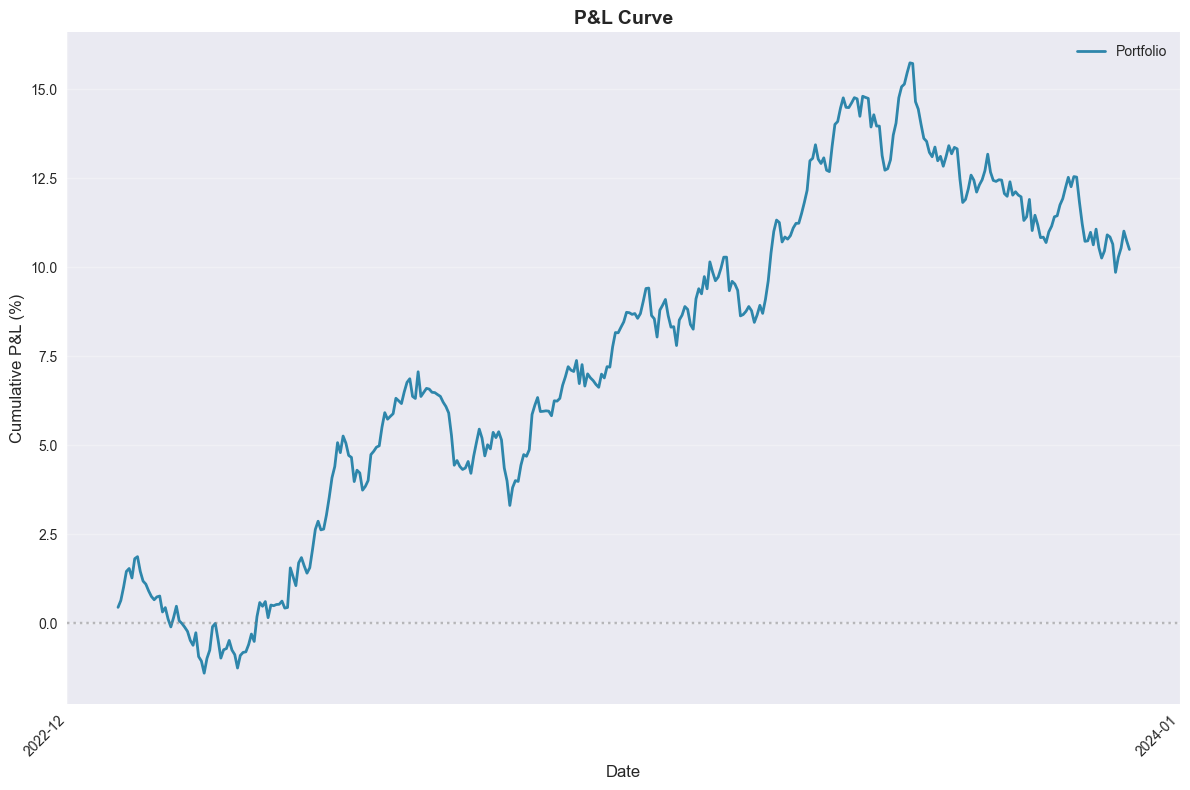

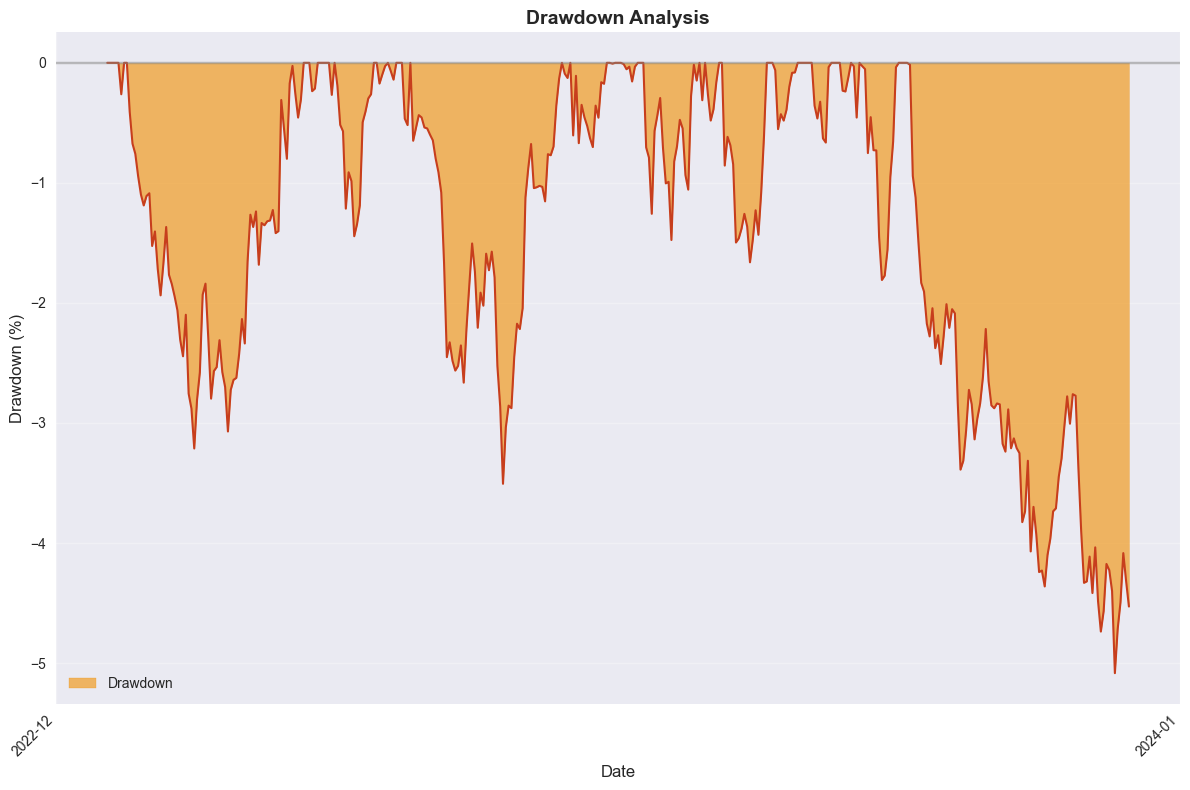

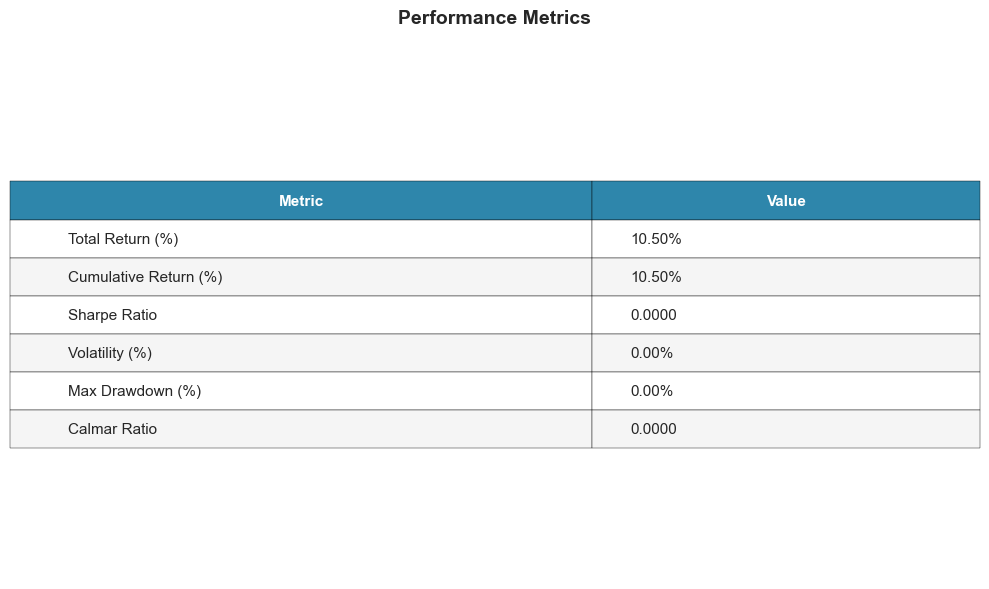

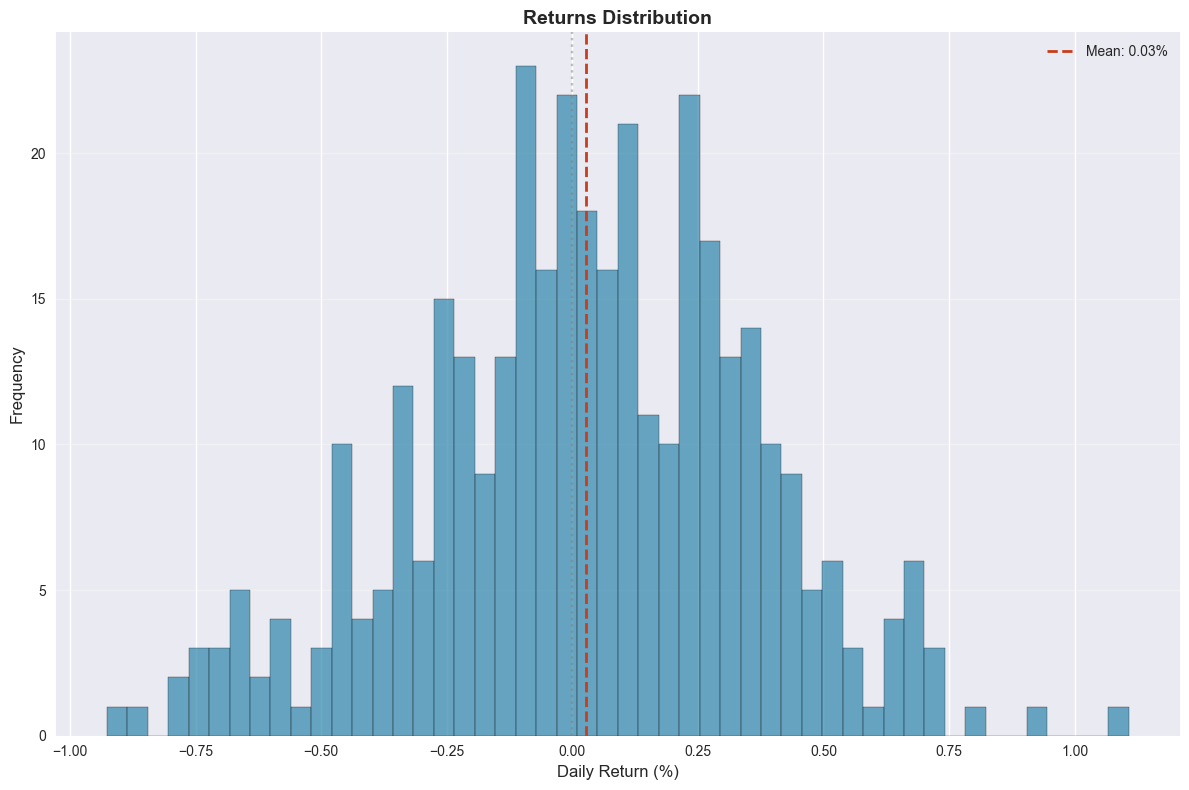

In [ ]:
# Reload modules to ensure we're using the latest code
import importlib
import sys

# Force reload backtest_agent module
if 'backtest_agent' in sys.modules:
    importlib.reload(sys.modules['backtest_agent'])

from backtest_agent import BacktestAgent
import pandas as pd
import numpy as np

agent = BacktestAgent()
print("✅ BacktestAgent loaded (module reloaded)")

# Generate random noise signals as predictions
# Create date range
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq='D')
instruments = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'BRK-B', 'JNJ', 'V', 
               'JPM', 'MA', 'PG', 'UNH', 'HD', 'DIS', 'BAC', 'XOM', 'CVX', 'ABBV']

# Generate random noise predictions (white noise)
# Each prediction is independent random noise following standard normal distribution
np.random.seed(42)  # For reproducibility
prediction_data = []
for date in dates:
    for instrument in instruments:
        prediction_data.append({
            'datetime': date,
            'instrument': instrument,
            'score': np.random.randn()  # Random noise signal (standard normal distribution)
        })

# Create predictions Series with MultiIndex (datetime, instrument)
pred_df = pd.DataFrame(prediction_data)
predictions = pred_df.set_index(['datetime', 'instrument'])['score']

print(f"Generated {len(predictions)} random noise predictions")
print(f"Date range: {predictions.index.get_level_values('datetime').min()} to {predictions.index.get_level_values('datetime').max()}")
print(f"Instruments: {len(instruments)}")
print(f"Prediction statistics: mean={predictions.mean():.4f}, std={predictions.std():.4f}")

# Run backtest with random noise signals (符合论文接口设计)
results = agent.run_simple_backtest_paper_interface(
    predictions=predictions,  # Use random noise signals
    start_time="2023-01-01",
    end_time="2023-12-31",
    look_back_period=20,      # Paper key parameter
    investment_horizon=5,     # Paper key parameter
    topk=50,
    plot_results=True,
    output_dir="backtest_output/"
)

# View results
print(f"\n=== Backtest Results ===")
print(f"Total Return: {results['performance_metrics']['total_return']:.2%}")
print(f"Sharpe Ratio: {results['performance_metrics']['sharpe_ratio']:.3f}")
print(f"Max Drawdown: {results['performance_metrics']['max_drawdown']:.2%}")
print(f"Volatility: {results['performance_metrics']['volatility']:.2%}")